In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

vgsales = pd.read_csv("vgsales.csv", index_col=0)
vgsales.head(10)


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62


In [3]:
#Checking the shape of the data
vgsales.shape

(16598, 10)

A total number of 329 observations had missing values.

In [4]:
#Tabulate the frequency of missing values
vgsales.isna().sum()

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [5]:
#Remove all rows where there is a missing Year value. We can do this by dropping all rows where the Year column is missing and checking the shape of the dataframe. 
#vgsales.dropna(subset=['Year', 'Publisher'], inplace=True)
vgsales.shape

(16598, 10)

In [6]:
#Summary statistics
vgsales.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


We create a plot to visualize the regional trend in sales

In [7]:
vgsales_year= vgsales.groupby("Year")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum().reset_index()

vgsales_year.head(10)

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1980.0,10.59,0.67,0.00,0.12
1,1981.0,33.40,1.96,0.00,0.32
2,1982.0,26.92,1.65,0.00,0.31
3,1983.0,7.76,0.80,8.10,0.14
4,1984.0,33.28,2.10,14.27,0.70
5,1985.0,33.73,4.74,14.56,0.92
6,1986.0,12.50,2.84,19.81,1.93
7,1987.0,8.46,1.41,11.63,0.20
8,1988.0,23.87,6.59,15.76,0.99
9,1989.0,45.15,8.44,18.36,1.50


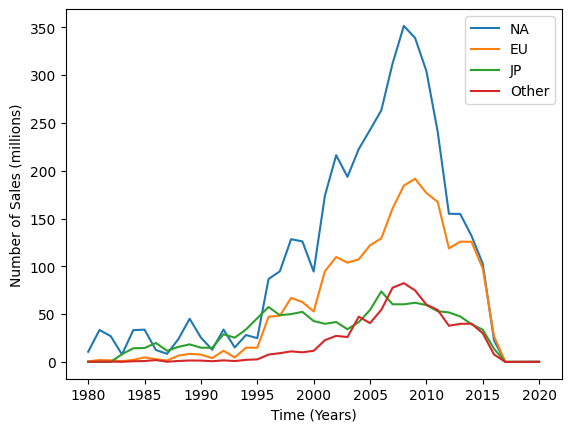

In [8]:
fig, ax = plt.subplots()
ax.plot(vgsales_year["Year"], vgsales_year["NA_Sales"])
ax.plot(vgsales_year["Year"], vgsales_year["EU_Sales"])
ax.plot(vgsales_year["Year"], vgsales_year["JP_Sales"])
ax.plot(vgsales_year["Year"], vgsales_year["Other_Sales"])
plt.legend(['NA', 'EU', 'JP', 'Other'])
ax.set_xlabel("Time (Years)") 
ax.set_ylabel("Number of Sales (millions)") 

plt.show()


In [9]:
vgsales_genre= vgsales.groupby("Genre")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum().reset_index()
vgsales_genre["Total_Sales"] = vgsales_genre["NA_Sales"] + vgsales_genre["EU_Sales"] + vgsales_genre["JP_Sales"] + vgsales_genre["Other_Sales"]
vgsales_genre= vgsales_genre.sort_values(by="Total_Sales", ascending=False)
vgsales_genre.head(20)

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Action,877.83,525.00,159.95,187.38,1750.16
10,Sports,683.35,376.85,135.37,134.97,1330.54
8,Shooter,582.60,313.27,38.28,102.69,1036.84
7,Role-Playing,327.28,188.06,352.31,59.61,927.26
4,Platform,447.05,201.63,130.77,51.59,831.04
3,Misc,410.24,215.98,107.76,75.32,809.30
6,Racing,359.42,238.39,56.69,77.27,731.77
2,Fighting,223.59,101.32,87.35,36.68,448.94
9,Simulation,183.31,113.38,63.70,31.52,391.91
5,Puzzle,123.78,50.78,57.31,12.55,244.42


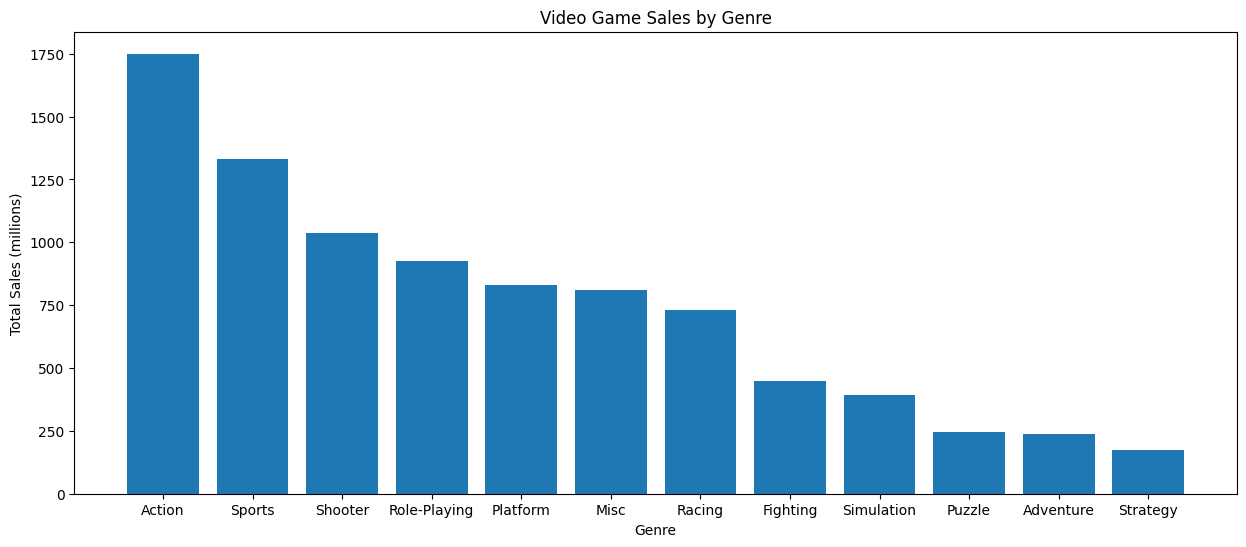

In [33]:
fig, ax = plt.subplots(figsize=(15, 6))

ax.bar(vgsales_genre['Genre'], vgsales_genre['Total_Sales'])
plt.xlabel('Genre')
plt.ylabel('Total Sales (millions)')
plt.title('Video Game Sales by Genre')
plt.show()

In [46]:
vgsales_name= vgsales.groupby("Name")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum().reset_index()
vgsales_name["Total_Sales"] = vgsales_name["NA_Sales"] + vgsales_name["EU_Sales"] + vgsales_name["JP_Sales"] + vgsales_name["Other_Sales"]
vgsales_name= vgsales_name.sort_values(by="Total_Sales", ascending=False).head(5)
print(vgsales_name)

                     Name  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
11007          Wii Sports     41.49     29.02      3.77         8.46   
3712   Grand Theft Auto V     23.46     23.04      1.39         8.03   
9327    Super Mario Bros.     32.48      4.88      6.96         0.99   
9715               Tetris     26.17      2.95      6.03         0.69   
5573       Mario Kart Wii     15.85     12.88      3.79         3.31   

       Total_Sales  
11007        82.74  
3712         55.92  
9327         45.31  
9715         35.84  
5573         35.83  


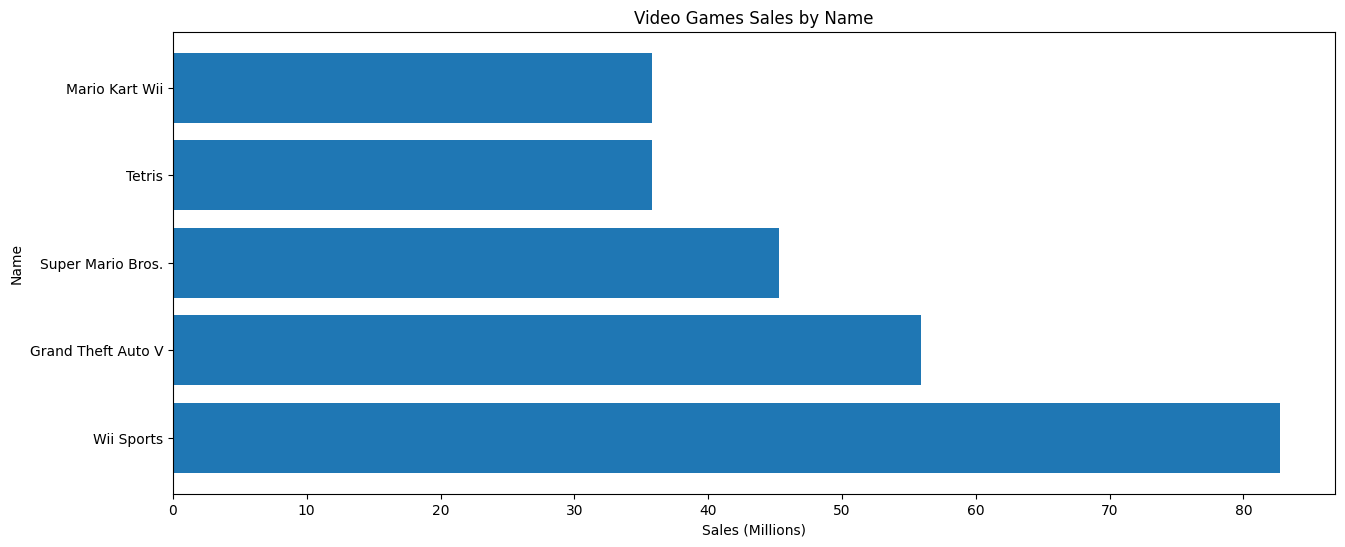

In [54]:
fig, ax = plt.subplots(figsize=(15, 6))

ax.barh(vgsales_name['Name'], vgsales_name['Total_Sales'])
plt.xlabel('Sales (Millions)')
plt.ylabel('Name')
plt.title('Video Games Sales by Name')
plt.show()

Which of the three seventh generation consoles (Xbox 360, Playstation 3, and Nintendo Wii) had the highest total sales globally?

In [10]:
vgsales_plat= vgsales.groupby("Platform")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum().reset_index()

vgsales_plat["Total_Sales"] = vgsales_plat["NA_Sales"] + vgsales_plat["EU_Sales"] 
+ vgsales_plat["JP_Sales"] + vgsales_plat["Other_Sales"]

vgsales_plat_sort= vgsales_plat.sort_values("Total_Sales", ascending=False)
print(vgsales_plat_sort.head(15))


   Platform  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Total_Sales
16      PS2    583.84    339.29    139.20       193.44       923.13
28     X360    601.05    280.58     12.43        85.54       881.63
26      Wii    507.71    268.38     69.35        80.61       776.09
17      PS3    392.26    343.71     79.99       141.93       735.97
4        DS    390.71    194.65    175.57        60.53       585.36
15       PS    336.51    213.60    139.82        40.91       550.11
6       GBA    187.54     75.25     47.33         7.73       262.79
29       XB    186.69     60.95      1.38         8.72       247.64
13       PC     93.28    139.68      0.17        24.86       232.96
18      PS4     96.80    123.70     14.30        43.36       220.50
10      N64    139.02     41.06     34.22         4.38       180.08
19      PSP    108.99     68.25     76.79        42.19       177.24
7        GC    133.46     38.71     21.58         5.18       172.17
5        GB    114.32     47.82     85.12       

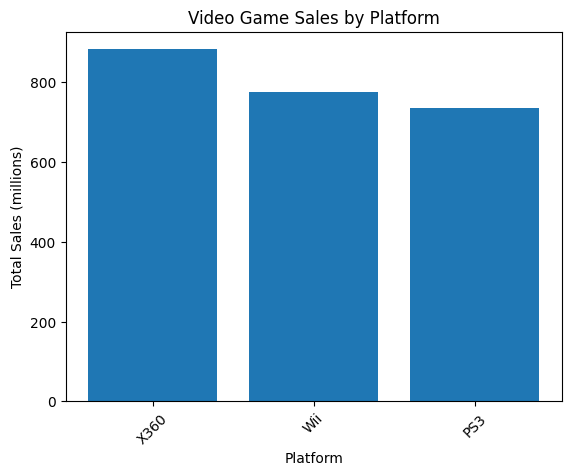

In [11]:

# Create a figure with a larger width
fig, ax = plt.subplots()

# Filter the data for specific platforms
platforms = ['X360', 'Wii', 'PS3']
filtered_data = vgsales_plat_sort[vgsales_plat_sort['Platform'].isin(platforms)]

# Plot the bar chart
ax.bar(filtered_data['Platform'], filtered_data['Total_Sales'])

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Set the x-axis label, y-axis label, and title
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')
plt.title('Video Game Sales by Platform')

# Display the chart
plt.show()


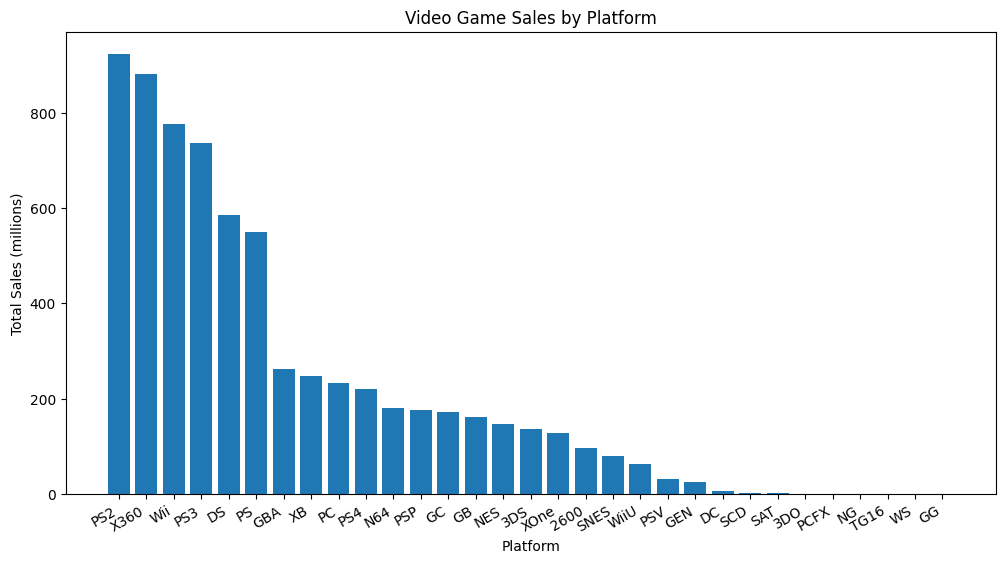

In [12]:

# Create a figure with a larger width

fig, ax = plt.subplots(figsize=(12, 6))

# Plot the bar chart
ax.bar(vgsales_plat_sort['Platform'], vgsales_plat_sort['Total_Sales'])

# Rotate the x-axis labels
plt.xticks(rotation=30, ha='right')

# Set the x-axis label, y-axis label, and title
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')
plt.title('Video Game Sales by Platform')

# Display the chart
plt.show()

It's suspected that certain regions have an influence on the other regions per game genre. Now we investigate this using a correlation heatmap of fighting games across all years

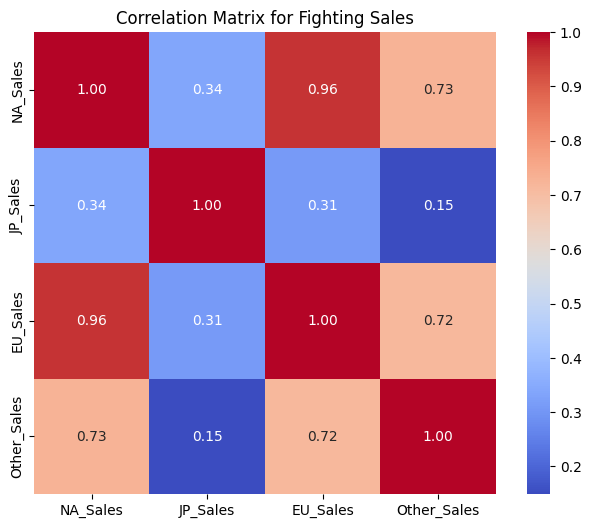

In [13]:
fighting_sales_corr = vgsales[vgsales['Genre'] == 'Fighting'].groupby("Year")[["NA_Sales", "JP_Sales", "EU_Sales", "Other_Sales"]].sum().reset_index()
sales_subset = vgsales[['NA_Sales', 'JP_Sales', 'EU_Sales', 'Other_Sales']]

# Build correlation matrix
correlation_matrix = sales_subset.corr()


import seaborn as sns

# Select the relevant columns
sales_subset = fighting_sales_corr[['NA_Sales', 'JP_Sales', 'EU_Sales', 'Other_Sales']]

# Calculate the correlation matrix
correlation_matrix = sales_subset.corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

# Set title
plt.title('Correlation Matrix for Fighting Sales')

# Show the plot
plt.show()

In [14]:
def corr_func(param1, param2):
    corr_value= vgsales[param1].corr(vgsales[param2])
    string = ("The correlation between " + param1 + 
                " and " + param2 + " is: " + str(corr_value))

    return print(string)

#Use it on various fields of the data
corr_func("NA_Sales", "EU_Sales")
corr_func("EU_Sales", "Other_Sales")
corr_func("NA_Sales", "Other_Sales")
corr_func("NA_Sales", "JP_Sales")
corr_func("EU_Sales", "JP_Sales")

The correlation between NA_Sales and EU_Sales is: 0.767726748370264
The correlation between EU_Sales and Other_Sales is: 0.7263848893745157
The correlation between NA_Sales and Other_Sales is: 0.634737271904541
The correlation between NA_Sales and JP_Sales is: 0.44978740707042486
The correlation between EU_Sales and JP_Sales is: 0.43558445280918123


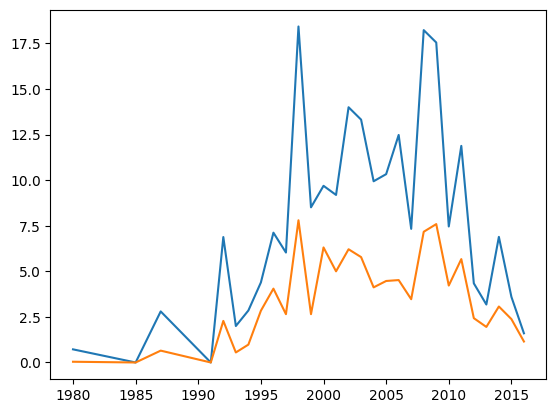

In [15]:
fig, ax = plt.subplots()
ax.plot(fighting_sales_corr["Year"], fighting_sales_corr["NA_Sales"])
ax.plot(fighting_sales_corr["Year"], fighting_sales_corr["EU_Sales"])
plt.show()

It turns out that when it comes to fighting games, EU and NA are highly correlated in terms of the number of sales. Additionally, EU and NA correlate highly with other regions, showing their influence on the number of sales. As to which regions are the cause or effect requires further investigation and analysis beyond correlation alone.



We also need to investigate the regional correlation across sports, actions, RPG and shooters.

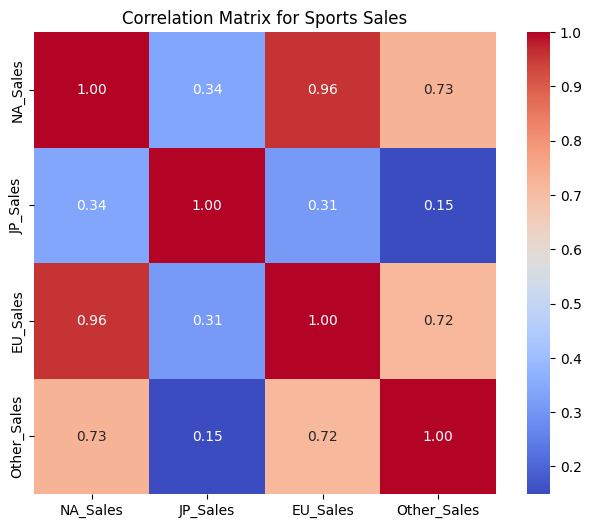

In [16]:
sports_sales_corr = vgsales[vgsales['Genre'] == 'Sports'].groupby("Year")[["NA_Sales", "JP_Sales", "EU_Sales", "Other_Sales"]].sum().reset_index()

# Select the relevant columns
sports_sales_subset = sports_sales_corr[['NA_Sales', 'JP_Sales', 'EU_Sales', 'Other_Sales']]

# Calculate the correlation matrix
correlation_matrix = sales_subset.corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

# Set title
plt.title('Correlation Matrix for Sports Sales')

# Show the plot
plt.show()

How about in general (across all genres)?

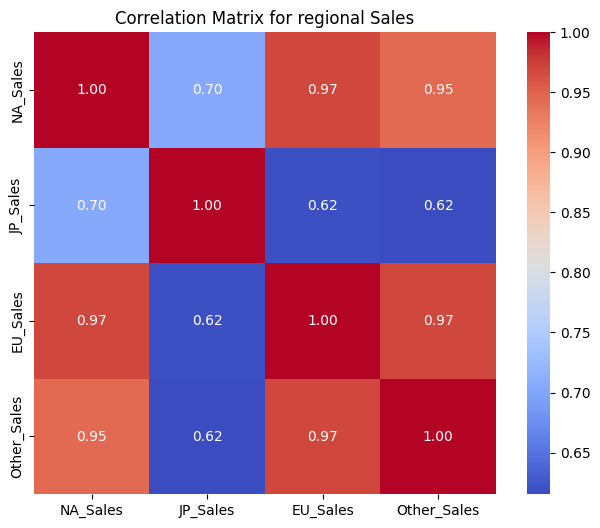

In [17]:
regional_sales_corr = vgsales.groupby("Year")[["NA_Sales", "JP_Sales", "EU_Sales", "Other_Sales"]].sum().reset_index()

# Select the relevant columns
regional_sales_subset = sports_sales_corr[['NA_Sales', 'JP_Sales', 'EU_Sales', 'Other_Sales']]

# Calculate the correlation matrix
correlation_matrix = regional_sales_subset.corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

# Set title
plt.title('Correlation Matrix for regional Sales')

# Show the plot
plt.show()

Are some genres significantly more likely to perform better or worse in Japan than others? If so, which ones? We answer this using Tukey's post hoc test & a one-way ANOVA test to compare the sales performance of different genres in Japan.

In [18]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Subset the data for Japan sales and genre
japan_sales_genre = vgsales[vgsales['JP_Sales'].notnull()][['Genre', 'JP_Sales']]


# Perform Tukey's post hoc test
posthoc = pairwise_tukeyhsd(japan_sales_genre['JP_Sales'], japan_sales_genre['Genre'])

tukey_results = pd.DataFrame(data=posthoc._results_table.data[1:], columns=posthoc._results_table.data[0])
print(tukey_results.head(20))
# Display ANOVA table and Tukey's post hoc test results

#print("\nTukey's Post Hoc Test:")
#print(posthoc)


       group1        group2  meandiff   p-adj   lower   upper  reject
0      Action     Adventure   -0.0077  0.9998 -0.0404  0.0249   False
1      Action      Fighting    0.0548  0.0002  0.0165  0.0930    True
2      Action          Misc    0.0137  0.9341 -0.0157  0.0432   False
3      Action      Platform    0.0994  0.0000  0.0618  0.1370    True
4      Action        Puzzle    0.0502  0.0128  0.0056  0.0949    True
5      Action        Racing   -0.0028  1.0000 -0.0359  0.0302   False
6      Action  Role-Playing    0.1885  0.0000  0.1575  0.2196    True
7      Action       Shooter   -0.0190  0.7497 -0.0515  0.0134   False
8      Action    Simulation    0.0252  0.5679 -0.0127  0.0632   False
9      Action        Sports    0.0095  0.9921 -0.0174  0.0363   False
10     Action      Strategy    0.0244  0.7557 -0.0174  0.0662   False
11  Adventure      Fighting    0.0625  0.0002  0.0185  0.1065    True
12  Adventure          Misc    0.0215  0.7470 -0.0151  0.0580   False
13  Adventure      P

In [19]:
# Perform one-way ANOVA
model = ols('JP_Sales ~ Genre', data=japan_sales_genre).fit()
anova_table = sm.stats.anova_lm(model)
print("ANOVA Results:")
print(anova_table)

ANOVA Results:
               df       sum_sq   mean_sq          F         PR(>F)
Genre        11.0    53.216370  4.837852  52.292261  3.143237e-114
Residual  16586.0  1534.464351  0.092516        NaN            NaN


You are working as a data analyst for a video game retailer based in Japan. The retailer typically orders games based on sales in North America and Europe, as the games are often released later in Japan. 

However, they have found that North American and European sales are not always a perfect predictor of how a game will sell in Japan.

Your manager has asked you to develop a model that can predict the sales in Japan using sales in North America and Europe and other attributes such as the name of the game, the platform, the genre, and the publisher.

(Multiple linear regressions can be used to predict the sales in Japan.)


In [20]:
%%script false
# Perform One-Hot Encoding for platform and genre fields
vgsales_encoded = pd.get_dummies(vgsales, columns=['Platform'], prefix= 'Platform', drop_first=True)
vgsales_encoded = pd.get_dummies(vgsales_encoded, columns=['Genre'], prefix= 'Genre', drop_first=True)

# Display the encoded DataFrame
print(vgsales_encoded.head(10))

#Save the encoded DataFrame as a CSV file
vgsales_encoded.to_csv('vgsales_encoded.csv', index=False)

Couldn't find program: 'false'


In [21]:

%%script false
#Hash Encoding

import category_encoders as ce

# Create the HashingEncoder object
encoder = ce.HashingEncoder(cols=['Platform', 'Genre'], n_components=45)

# Apply hash encoding to the specified columns
hash_res = encoder.fit_transform(vgsales[['Platform', 'Genre']])

# Display a sample of the transformed data
print(hash_res.sample(5))

pd.concat([encoder.fit_transform(vgsales[['Platform', 'Genre']]), vgsales], axis =1).sample(5)
vgsales_hash_encoded= pd.concat([encoder.fit_transform(vgsales[['Platform', 'Genre']]), vgsales], axis =1)

#Save the transformed data as a csv file
#vgsales_hash_encoded.to_csv('vgsales_hash_encoded.csv', index=False)

Couldn't find program: 'false'


In [22]:
#Concatenate the encoded data with the original data
#import pandas as pd
#import category_encoders as ce

# Create the HashingEncoder object
#encoder = ce.HashingEncoder(cols=['Platform', 'Genre'], n_components=40)

# Perform hash encoding and concatenate with vgsales DataFrame
#vgsales_hash_encoded = pd.concat([encoder.fit_transform(vgsales[['Platform', 'Genre']]), vgsales], axis=1)

# Display a sample of the encoded DataFrame
#print(vgsales_hash_encoded.sample(5))

# Save the encoded DataFrame as a CSV file to see
#vgsales_hash_encoded.to_csv('vgsales_hash_encoded.csv', index=False)


# Regression Analysis

Now we start the regression analysis, taking Sales in Europe and North America, and the game platform and genres as feature variables.

To do this, we have to encode the platform and genre columns as they are categorical variables. This is done using one-hot encoding from the category_encoders library.

In [23]:
#Regression Analysis

from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import category_encoders as ce
import sklearn.metrics as sm_metrics

# Specify the target variable
label = "JP_Sales"

# Define predictor variables and target variable
X = vgsales[['NA_Sales', 'EU_Sales', 'Platform', 'Genre']]
y = vgsales[["JP_Sales"]]

# Perform one-hot encoding for categorical variables
encoder = ce.OneHotEncoder(cols=['Platform', 'Genre'], drop_invariant=True, use_cat_names=True)

X_encoded = encoder.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=91)


print(X_train)

print(y_train)






#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

       NA_Sales  EU_Sales  Platform_Wii  Platform_NES  Platform_GB  \
Rank                                                                 
7694       0.10      0.08             0             0            0   
2519       0.19      0.41             0             0            0   
6340       0.20      0.04             0             0            0   
12880      0.04      0.01             0             0            0   
6784       0.21      0.02             0             0            0   
...         ...       ...           ...           ...          ...   
10022      0.08      0.03             0             0            0   
14111      0.00      0.00             0             0            0   
211        2.31      1.73             0             0            0   
12140      0.00      0.00             1             0            0   
1712       0.50      0.18             0             0            1   

       Platform_DS  Platform_X360  Platform_PS3  Platform_PS2  Platform_SNES  \
Rank     

After splitting the data between training and testing, we run a regression analysis to see what the model understands from the training data.

In [24]:
# Fit the OLS model
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm)
results = model.fit()

# Print the summary of the model
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:               JP_Sales   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     196.7
Date:                Sat, 29 Jul 2023   Prob (F-statistic):               0.00
Time:                        23:38:15   Log-Likelihood:                 37.570
No. Observations:               13278   AIC:                             10.86
Df Residuals:                   13235   BIC:                             333.1
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1057      0

From the regression analysis, a few key insights can be drawn:
1. The R-squared value is approximately 0.343, indicating that about 34.3% of the variability in JP_Sales is explained by the predictor variables in the model.

2. The NA_Sales variable has a coefficient of approximately 0.0766. This suggests that for every unit increase in NA_Sales, the model predicts a 0.0766 unit increase in JP_Sales, holding all other variables constant.

3. The EU_Sales variable has a coefficient of approximately 0.1427, indicating that for every unit increase in EU_Sales, the model predicts a 0.1427 unit increase in JP_Sales.

4. The P-values (P>|t|) represent the probability of obtaining the observed results or more extreme results if the null hypothesis is true. Lower P-values (typically below 0.05) suggest that the predictor variable is statistically significant and likely to have a meaningful effect on the dependent variable. Higher P-values indicate that the variable may not be significant.
    - The indicator variables for sales in America and Europe have a very small p-value which is means that they are statistically significant in affecting the target variable (Sales in Japan). This is not very surprising.
    - Many platforms and genres are statistically insignificant in influencing the target variables, save a few. For significant platforms we have: NES & GB (Gameboy); while for Genres we have: RPG (Role-playing Games) and Shooters

Next, we will attempt another Regression analysis with these variable filters. We will start by filtering for only Role-Playing and Shooters 

In [25]:
# Filter conditions for 'Genre' columns

#platform_filter = (vgsales['Platform']) 

genre_filter = (vgsales['Genre'].isin(['Role-Playing', 'Shooter']))  # Filter for 'Role-Playing' or 'Shooters' 

# Apply the filters to get the filtered DataFrame
filtered_vgsales = vgsales[genre_filter]

# Display the filtered DataFrame
print(filtered_vgsales)

                                                    Name Platform    Year  \
Rank                                                                        
5                               Pokemon Red/Pokemon Blue       GB  1996.0   
10                                             Duck Hunt      NES  1984.0   
13                           Pokemon Gold/Pokemon Silver       GB  1999.0   
21                         Pokemon Diamond/Pokemon Pearl       DS  2006.0   
26                         Pokemon Ruby/Pokemon Sapphire      GBA  2002.0   
...                                                  ...      ...     ...   
16572                                 Resident Evil 4 HD     XOne  2016.0   
16580                                          Damnation       PC  2009.0   
16588                                             Breach       PC  2011.0   
16593  Eiyuu Densetsu: Sora no Kiseki Material Collec...      PSP  2007.0   
16597                      Men in Black II: Alien Escape       GC  2003.0   

And then we encode and train a new model.

In [26]:
# Define predictor variables and target variable
X2 = filtered_vgsales[['NA_Sales', 'EU_Sales', 'Platform', 'Genre']]
y2 = filtered_vgsales[["JP_Sales"]]


# Perform one-hot encoding for categorical variables
encoder = ce.OneHotEncoder(cols=['Platform', 'Genre'], drop_invariant=True, use_cat_names=True)

X2_encoded = encoder.fit_transform(X2)

# Split the data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_encoded, y2, train_size=0.8, test_size=0.2, random_state=90)


print(X2_train)

print(y2_train)


       NA_Sales  EU_Sales  Platform_GB  Platform_NES  Platform_DS  \
Rank                                                                
826        1.16      0.06            0             0            1   
928        0.94      0.44            0             0            0   
16523      0.00      0.00            0             0            0   
2183       0.26      0.17            0             0            0   
464        1.40      1.07            0             0            0   
...         ...       ...          ...           ...          ...   
16005      0.00      0.00            0             0            1   
7313       0.10      0.10            0             0            0   
15920      0.00      0.00            0             0            0   
9164       0.02      0.01            0             0            0   
15902      0.00      0.00            0             0            0   

       Platform_GBA  Platform_X360  Platform_3DS  Platform_PS4  Platform_PS3  \
Rank                  

Now we train and fit another OLS model 

In [27]:
# Fit the OLS model
X2_train_sm = sm.add_constant(X2_train)
model = sm.OLS(y2_train, X2_train_sm)
results2 = model.fit()

# Print the summary of the model
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:               JP_Sales   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     36.39
Date:                Sat, 29 Jul 2023   Prob (F-statistic):          6.86e-164
Time:                        23:38:15   Log-Likelihood:                -1074.2
No. Observations:                2238   AIC:                             2208.
Df Residuals:                    2208   BIC:                             2380.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.397e+12   1.98